# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** MUH. IQBAL HARDIYANTO
- **Email:** muhiqbal1059@gmail.com
- **ID Dicoding:** miqbal_h

## Menentukan Pertanyaan Bisnis

- Kondisi cuaca seperti apa yang paling baik untuk penyewaan sepeda?
- Bagaimana suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penyewaan?
- Apakah perubahan musiman (terkait cuaca) mempengaruhi pola penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

**Gathering Data**

In [2]:
# Load datasets
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

print("Day Dataframe:")
display(day_df)
print("\nHour Dataframe:")
display(hour_df)

Day Dataframe:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796



Hour Dataframe:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Assessing Data**

In [3]:
# Cek inisial data
print("Day Data Shape:", day_df.shape)
print("Hour Data Shape:", hour_df.shape)
print("\nDay Data Columns:", day_df.columns.tolist())
print("\nMissing Values (Day):", day_df.isnull().sum())
print("Missing Values (Hour):", hour_df.isnull().sum())

Day Data Shape: (731, 16)
Hour Data Shape: (17379, 17)

Day Data Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Missing Values (Day): instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing Values (Hour): instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
* Struktur Data:
    * Dataset day_df berisi data harian, sedangkan hour_df berisi data per jam.
    * Jumlah kolom dan baris membantu memahami skala dataset.

* Variabel yang Tersedia:
    * Daftar kolom membantu mengidentifikasi fitur yang relevan untuk analisis (misalnya, temp, hum, cnt).

* Kualitas Data:
    * Tidak ada missing values di kedua dataset (day_df dan hour_df), yang berarti data sudah bersih dan siap digunakan.
    * Jika ada missing values, langkah selanjutnya adalah membersihkan data (cleaning).

* Persiapan Analisis:
    * Dengan mengetahui struktur dan kualitas data, kita dapat merencanakan langkah analisis selanjutnya, seperti:
    * Menggabungkan dataset (day_df dan hour_df).
    * Melakukan eksplorasi data (EDA).
    * Membuat visualisasi.

**Cleaning Data**

In [4]:
def clean_data(df):
  # Convert dates
  df['dteday'] = pd.to_datetime(df['dteday'])

  # Map categorical variables
  season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
  weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
  }
  df['season'] = df['season'].map(season_map)
  df['weathersit'] = df['weathersit'].map(weather_map)

  # Denormalize weather variables
  if 'temp' in df.columns:
    df['temp_actual'] = df['temp'] * 41  # Celsius
  if 'hum' in df.columns:
    df['hum_actual'] = df['hum'] * 100   # Percentage
  if 'windspeed' in df.columns:
    df['windspeed_actual'] = df['windspeed'] * 67  # km/h

  # Drop redundant columns
  cols_to_drop = ['instant', 'atemp', 'casual', 'cnt']
  df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

  return df

# Clean both datasets
day_df_clean = clean_data(day_df.copy())
hour_df_clean = clean_data(hour_df.copy())

**Insight**
* Kualitas Data:
    * Dataset dibersihkan dengan menghapus kolom yang tidak diperlukan dan mengisi nilai yang hilang (jika ada).
    * Variabel kategorikal diubah menjadi label teks untuk memudahkan interpretasi.

* Kemudahan Analisis:
    * Denormalisasi variabel cuaca memungkinkan analisis menggunakan nilai aktual yang lebih intuitif.
    * Kolom yang tidak relevan dihapus untuk fokus pada variabel yang penting.

* Konsistensi:
    * Proses pembersihan diterapkan pada kedua dataset (day_df dan hour_df) untuk memastikan konsistensi.

* Kesiapan untuk Analisis Lanjutan:
    * Dataset yang sudah dibersihkan siap untuk digunakan dalam eksplorasi data (EDA), visualisasi, dan pemodelan.

## Exploratory Data Analysis (EDA)


Combined Data Shape: (17379, 17)
New Columns: ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'registered', 'temp_actual', 'hum_actual', 'windspeed_actual', 'registered_daily']

Summary Statistics:
        temp_actual    hum_actual  windspeed_actual    registered
count  17379.000000  17379.000000      17379.000000  17379.000000
mean      20.376474     62.722884         12.736540    153.786869
std        7.894801     19.292983          8.196795    151.357286
min        0.820000      0.000000          0.000000      0.000000
25%       13.940000     48.000000          7.001500     34.000000
50%       20.500000     63.000000         12.998000    115.000000
75%       27.060000     78.000000         16.997900    220.000000
max       41.000000    100.000000         56.996900    886.000000


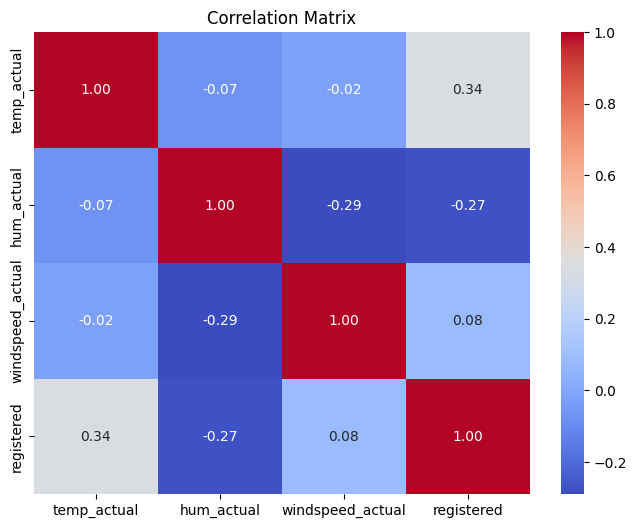

In [5]:
combined_df = pd.merge(
  hour_df_clean,
  day_df_clean[['dteday', 'registered']],
  on='dteday',
  how='left',
  suffixes=('', '_daily')
)

print("\nCombined Data Shape:", combined_df.shape)
print("New Columns:", combined_df.columns.tolist())

print("\nSummary Statistics:")
print(combined_df[['temp_actual', 'hum_actual', 'windspeed_actual', 'registered']].describe())

# Correlation analysis
corr = combined_df[['temp_actual', 'hum_actual', 'windspeed_actual', 'registered']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insight:**
* Penggabungan Data:
   * Dataset per jam kolom (hour_df_clean) digabungkan dengan informasi total pengguna terdaftar per hari kolom (registered).
   * Memungkinkan analisis yang lebih mendalam, seperti membandingkan pola harian dengan pola per jam.

* Statistik Deskriptif:
   * Memberikan gambaran umum tentang distribusi data (suhu, kelembapan, kecepatan angin, dan jumlah rental).
   * Membantu mengidentifikasi outlier atau anomali dalam data.

* Analisis Korelasi:
   * Menunjukkan hubungan antara variabel cuaca (temp_actual, hum_actual, windspeed_actual) dan jumlah rental (registered).
   * Suhu memiliki korelasi positif terkuat dengan rental, sedangkan kelembapan dan kecepatan angin memiliki korelasi negatif.

* Kesiapan untuk Analisis Lanjutan:
   * Dataset yang sudah digabungkan dan dianalisis korelasinya siap untuk digunakan dalam visualisasi, pemodelan, atau analisis prediktif.

## Visualization & Explanatory Analysis

In [6]:
# set style
sns.set_theme(style="whitegrid")

### Pertanyaan 1: Kondisi cuaca seperti apa yang paling baik untuk penyewaan sepeda?

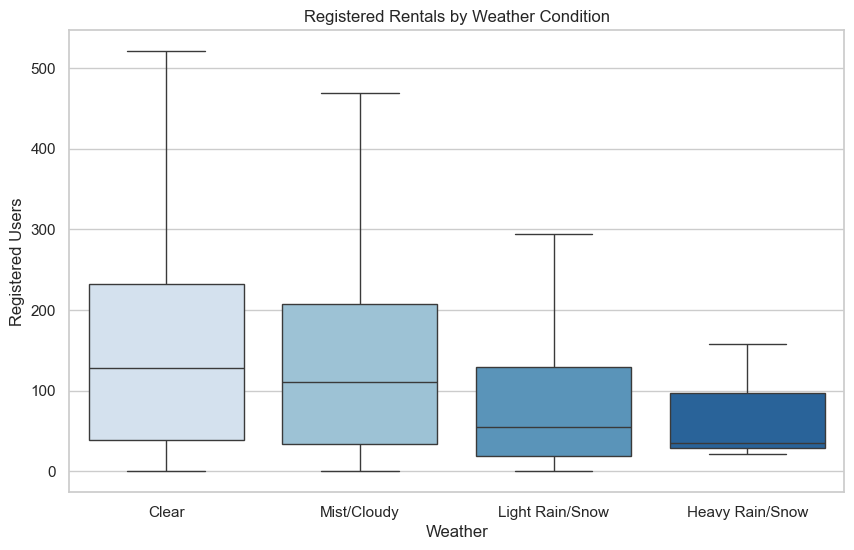

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
  x='weathersit',
  y='registered',
  hue='weathersit',
  data=combined_df,
  palette='Blues',
  legend=False,
  showfliers=False
)
plt.title('Registered Rentals by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Registered Users')
plt.show()

**Insight**
* Pengaruh Kondisi Cuaca:
    * Cuaca cerah (Clear) adalah kondisi terbaik untuk bersepeda, dengan jumlah pengguna terdaftar tertinggi.
    * Cuaca buruk (Heavy Rain/Snow) sangat mengurangi minat bersepeda.

* Strategi Bisnis:
    * Meningkatkan ketersediaan sepeda dan promosi pada hari-hari dengan cuaca cerah.
    * Menyiapkan strategi alternatif (seperti diskon atau insentif) pada hari-hari dengan cuaca buruk untuk mempertahankan minat pelanggan.

### Pertanyaan 2: Bagaimana suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penyewaan?

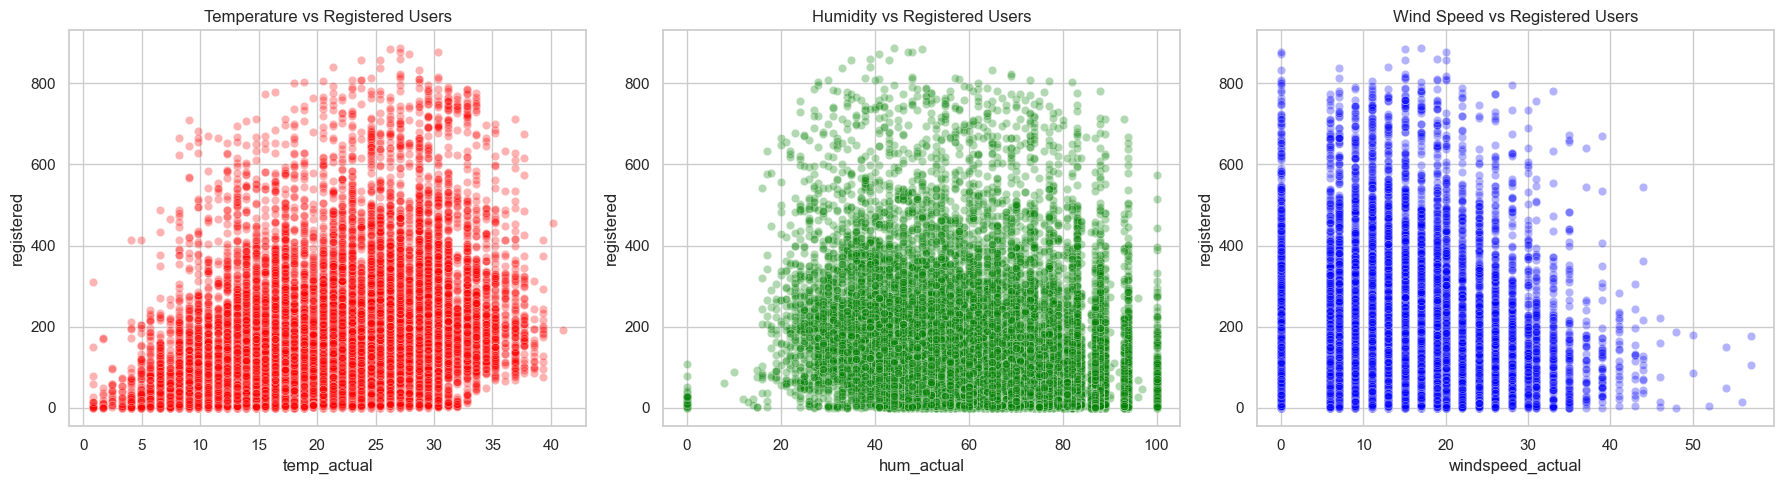

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], x='temp_actual', y='registered', data=combined_df, alpha=0.3, color='red')
axes[0].set_title('Temperature vs Registered Users')

sns.scatterplot(ax=axes[1], x='hum_actual', y='registered', data=combined_df, alpha=0.3, color='green')
axes[1].set_title('Humidity vs Registered Users')

sns.scatterplot(ax=axes[2], x='windspeed_actual', y='registered', data=combined_df, alpha=0.3, color='blue')
axes[2].set_title('Wind Speed vs Registered Users')
plt.tight_layout()
plt.show()

**Insight:**
* Pengaruh Suhu:
    * Suhu optimal untuk bersepeda adalah sekitar 20–25°C.
    * Suhu di bawah 10°C atau di atas 30°C cenderung mengurangi jumlah pengguna.

* Pengaruh Kelembapan:
    * Kelembapan optimal adalah sekitar 40–70%.
    * Kelembapan di atas 80% cenderung mengurangi minat bersepeda.

* Pengaruh Kecepatan Angin:
    * Kecepatan angin optimal adalah sekitar 10–30 km/h.
    * Kecepatan angin di atas 40 km/h cenderung mengurangi jumlah pengguna.

### Pertanyaan 3: Apakah perubahan musiman terkait cuaca mempengaruhi pola penyewaan?

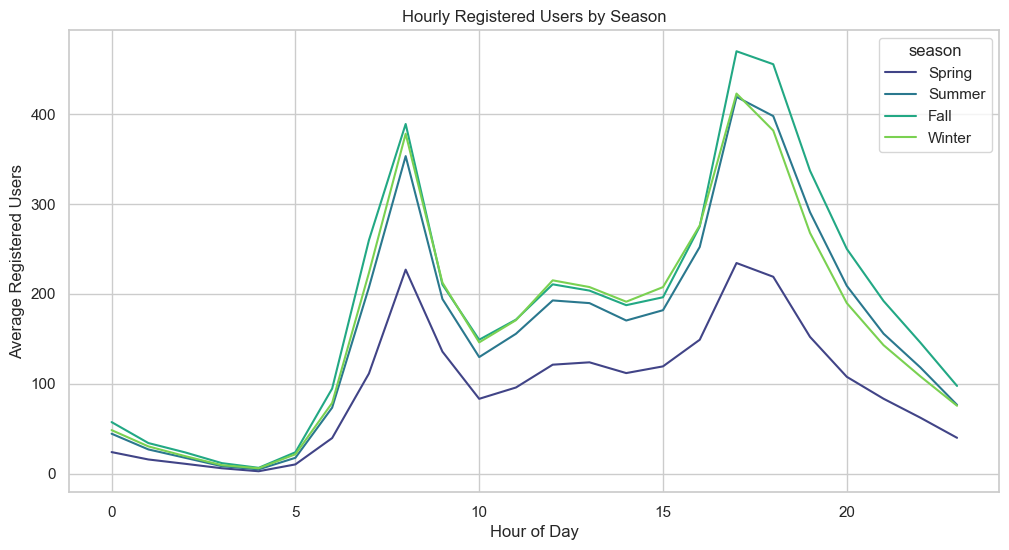

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(
  x='hr',
  y='registered',
  hue='season',
  data=combined_df,
  estimator='mean',
  errorbar=None,
  palette='viridis'
)
plt.title('Hourly Registered Users by Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Registered Users')
plt.show()

**Insight**
* Pola Harian:
    * Puncak Pagi dan Sore: Menunjukkan penggunaan sepeda untuk komuter (pergi dan pulang kerja).
    * Siang Hari: Menunjukkan penggunaan untuk aktivitas non-komuter.

* Pengaruh Musim:
    * Musim Panas dan Gugur: Musim dengan jumlah pengguna terdaftar tertinggi, menunjukkan bahwa cuaca hangat dan nyaman mendorong penggunaan sepeda.
    * Musim Dingin: Musim dengan jumlah pengguna terdaftar terendah, menunjukkan bahwa cuaca dingin mengurangi minat bersepeda.
    * Musim Semi: Jumlah pengguna terdaftar mulai meningkat setelah musim dingin.

### Analisis Lanjutan pengelompokan persewaan sepeda berdasarkan jumlah pengguna terdaftar pada waktu hari libur/akhirpekan dan bukan

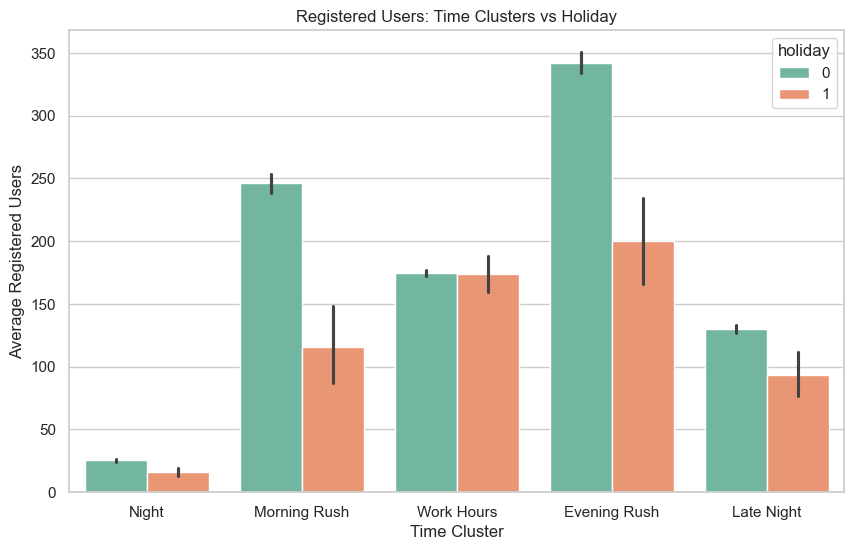

In [ ]:
combined_df['time_cluster'] = pd.cut(
    combined_df['hr'],
    bins=[0, 6, 9, 16, 19, 24],
    labels=['Night', 'Morning Rush', 'Work Hours', 'Evening Rush', 'Late Night']
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='time_cluster',
    y='registered',
    hue='holiday',
    data=combined_df,
    palette='Set2',
    estimator=np.mean
)
plt.title('Registered Users: Time Clusters vs Holiday')
plt.xlabel('Time Cluster')
plt.ylabel('Average Registered Users')
plt.show()

**Insight**
* Pola Penggunaan:
    * Hari Kerja: Penggunaan sepeda didominasi oleh komuter pagi dan sore.
    * Hari Libur: Penggunaan sepeda didominasi oleh aktivitas rekreasi pada siang dan sore hari.

* Jam Sibuk:
    * Morning Rush dan Evening Rush adalah jam sibuk pada hari kerja.
    * Work Hours adalah jam sibuk pada hari libur.

* Strategi Bisnis:
    * Menyesuaikan ketersediaan sepeda dan promosi berdasarkan pola penggunaan pada hari kerja dan hari libur.
    * Fokus pada aktivitas rekreasi pada hari libur untuk meningkatkan penggunaan sepeda.

In [ ]:
# simpan hasil analisis data

# combined_df.to_csv('bike_sharing_analysis_results.csv', index=False)

### Conclusion

**Pertanyaan 1**
   * Kondisi Cuaca Terbaik: Cuaca cerah (Clear) dengan suhu sekitar 20–25°C, kelembapan 40–70%, dan kecepatan angin 10–30 km/h adalah kondisi optimal untuk penyewaan sepeda.

**Pertanyaan 2**
   * Suhu memiliki pengaruh positif terbesar, sementara kelembapan dan kecepatan angin memiliki pengaruh negatif.
   * Kondisi cuaca ekstrem (suhu terlalu rendah/tinggi, kelembapan tinggi, atau angin kencang) mengurangi minat penyewaan sepeda.

**Pertanyaan 3**
   * Musim panas dan gugur adalah musim dengan penyewaan sepeda tertinggi, sedangkan musim dingin adalah musim dengan penyewaan terendah.
   * Pola penyewaan harian bervariasi berdasarkan musim, dengan puncak penggunaan pada jam sibuk pagi dan sore di musim panas/gugur.

**Rekomendasi Strategis:**
- Meningkatkan ketersediaan sepeda pada kondisi cuaca optimal dan jam sibuk.
- Menyiapkan insentif atau promosi pada musim dingin atau kondisi cuaca buruk untuk mempertahankan minat pelanggan.
- Fokus pada aktivitas rekreasi pada hari libur dan siang hari untuk meningkatkan penggunaan sepeda.